In [1]:
import tweepy
from collections import Counter
import re
from tweepy import OAuthHandler 
from textblob import TextBlob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Enter your own consumer key,consumer secret key,access token and access token secret key
consumer_key = "XXXXXXXXXXXXXXXXXXX" 
consumer_secret = "XXXXXXXXXXXXXXXXXXXXXXXXXX" 
access_token = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
access_token_secret = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

In [3]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 

In [4]:
auth.set_access_token(access_token, access_token_secret) 


In [5]:
api = tweepy.API(auth) 

#  a) latest trending topic for India. (#tag and no of tweets for the particular #tag)

In [6]:
def trendingInIndia():
    counter1=0
    counter2=0                                                                              
    # WOEID of India 
    woeid = 23424848
    
    trends = api.trends_place(id = woeid) 
  
    print("The top trends for the India are :") 
  
    for value in trends:    
        for trend in value['trends']: 
            counter1 +=1
            print("(",counter1,")", trend['name'])
            query = trend['name']
            volume=trend['tweet_volume']
            print(f"number of tweets for {trend['name']} = {volume}:")
            


In [7]:
trendingInIndia()

The top trends for the India are :
( 1 ) #INDvENG
number of tweets for #INDvENG = 124884:
( 2 ) #modi_job_do
number of tweets for #modi_job_do = 3542738:
( 3 ) #NiravModi
number of tweets for #NiravModi = None:
( 4 ) #AxarPatel
number of tweets for #AxarPatel = None:
( 5 ) #ApnaBharatMorcha
number of tweets for #ApnaBharatMorcha = None:
( 6 ) Joe Root
number of tweets for Joe Root = 13880:
( 7 ) 13 TRACKS
number of tweets for 13 TRACKS = 66017:
( 8 ) England
number of tweets for England = 148791:
( 9 ) Awaiting SSR Justice
number of tweets for Awaiting SSR Justice = 141389:
( 10 ) Stokes
number of tweets for Stokes = 13208:
( 11 ) Pitch
number of tweets for Pitch = 60798:
( 12 ) UK Court
number of tweets for UK Court = 10999:
( 13 ) rahane
number of tweets for rahane = None:
( 14 ) emma watson
number of tweets for emma watson = None:
( 15 ) नीरव मोदी
number of tweets for नीरव मोदी = None:
( 16 ) Coimbatore
number of tweets for Coimbatore = 24715:
( 17 ) Bairstow
number of tweets for Ba

# b) Extract first 100 tweets for a user

In [8]:
def first100Tweets(username):
    count=0
    
    name = username

    tweetCount = 100

    
    results = api.user_timeline(id=name, count=tweetCount)


    for tweet in results:
        
        count +=1
        print("(",count,")",tweet.text)
        
    if(count < tweetCount):
        print(f"There are only {count} tweets of {username}")

In [9]:
first100Tweets('JoeBiden')

( 1 ) RT @WhiteHouse: On Friday, President Biden toured a Pfizer manufacturing plant in Michigan to see the vaccine production process firsthand…
( 2 ) RT @POTUS: When I met with Prime Minister @JustinTrudeau in 2016, I said the world needed more leaders like him. A lot has changed since th…
( 3 ) RT @POTUS: Small businesses need relief, but many were muscled out of the way by big companies last year. That’s why starting today, we’re…
( 4 ) RT @JoeBiden: We need a president who is respected on the world stage. https://t.co/Hqv6T06Mtv
( 5 ) RT @POTUS: We will get through this, I promise you. https://t.co/dtmi4C9WsM
( 6 ) RT @POTUS: 500,000 lives lost to COVID-19. It’s an unfathomable number, but each one represents a family that will never again be whole. To…
( 7 ) RT @POTUS: I know folks have a lot of questions about COVID-19 mutations, our vaccination progress, and much more. @CDCDirector Dr. Walensk…
( 8 ) RT @POTUS: If there’s one message I want to cut through to everyone in this co

# c) Sentiment Analysis for a Person (Is it positive/negative, what is the perception)


In [10]:
def sentimentAnalysis(username):
    noOfTweets=5000
    tweets=api.search(username,count=noOfTweets)
    
    positive = 0
    negative = 0
    neutral = 0
    polarity = 0
    
    for tweet in tweets:
        #print(tweet.text)
        analysis = TextBlob(tweet.text)
        polarity += analysis.sentiment.polarity
        
        if analysis.sentiment.polarity == 0:
            neutral += 1
        elif analysis.sentiment.polarity < 0.00:
            negative += 1
        elif analysis.sentiment.polarity > 0.00:
            positive += 1
    positive = (float(positive)/float(noOfTweets))*100*100
    negative = (float(negative)/float(noOfTweets))*100*100
    neutral = (float(neutral)/float(noOfTweets))*100*100
    polarity = (float(polarity)/float(noOfTweets))*100
    neutral=100-(positive+negative)
    positive = format(positive, '.2f' )
    negative = format(negative, '.2f' )
    neutral = format(neutral, '.2f' )
    
    print(f"The sentiment analysis for {username} by analyzing {noOfTweets} tweets :")
    print('positive sentiments are:',positive)
    print('negative sentiments are:',negative)
    print('neutral sentiments are:',neutral)
    print("Overall Polarity is:",polarity)
    if polarity == 0:
        print("Neutral")
    elif polarity < 0.00:
        print("Negative")
    elif polarity > 0.00:
        print("positive")
    labels=['Positive ['+str(positive)+'%]', 'Neutral ['+str(neutral)+'%]', 'Negative ['+str(negative)+'%]']
    size=[positive, neutral, negative]
    colors=['blue', 'green', 'red']
    patches, texts =plt.pie(size,colors=colors, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.title('Sentiment Analysis For '+username)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()
    

    

The sentiment analysis for JoeBiden by analyzing 5000 tweets :
positive sentiments are: 44.00
negative sentiments are: 34.00
neutral sentiments are: 22.00
Overall Polarity is: 0.09011060606060609
positive


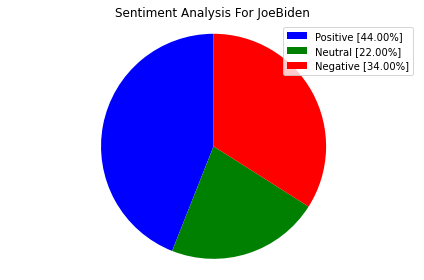

In [11]:
sentimentAnalysis('JoeBiden')

The sentiment analysis for Joe Biden by analyzing 5000 tweets :
positive sentiments are: 48.00
negative sentiments are: 30.00
neutral sentiments are: 22.00
Overall Polarity is: 0.0911314935064935
positive


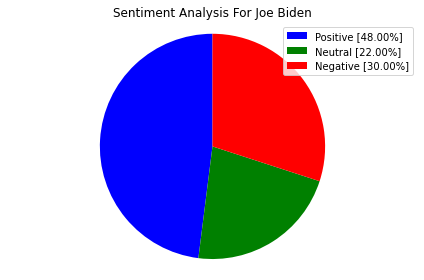

In [12]:
sentimentAnalysis('Joe Biden')